### Assess the candidate markers identified by weighted-shannon method.
- Author: Huamei Li
- Date: 2023-05-19
- Email: li_hua_mei@163.com
- Institute: Nanjing University

In [1]:
suppressMessages(require(Seurat))
suppressMessages(require(ggplot2))
suppressMessages(require(dplyr))
suppressMessages(require(reticulate))
suppressMessages(require(stringr))
suppressMessages(require(ggpubr))
suppressMessages(require(tidydr))

In [2]:
source('modules/globalParams.R')

In [3]:
out.figs.dir <- '../2.results/performance.of.candidate.markers/figs'
out.data.dir <- '../2.results/performance.of.candidate.markers/data'

In [4]:
dir.create(out.figs.dir, showWarnings = FALSE, recursive = TRUE)
dir.create(out.data.dir, showWarnings = FALSE, recursive = TRUE)

### Loading data

In [5]:
markers <- readRDS('../0.data/sctBrain.markers.RDS')
sc.obj <- readRDS('../0.data/sctBrain.sc.obj.RDS')

In [6]:
sc.obj <- SCTransform(sc.obj, ncells = 3000, verbose = FALSE) %>%
    RunPCA(verbose = FALSE) %>%
    RunUMAP(dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:19:05 UMAP embedding parameters a = 0.9922 b = 1.112

14:19:05 Read 14249 rows and found 30 numeric columns

14:19:05 Using Annoy for neighbor search, n_neighbors = 30

14:19:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:19:07 Writing NN index file to temp file /tmp/RtmpLk6OdD/filec43a27194353

14:19:07 Searching Annoy index using 1 thread, search_k = 3000

14:19:11 Annoy recall = 100%

14:19:11 Commencing smooth kNN distance calibration using 1 thread

14:19:12 Found 7 connect

### UMAP plot of mouse sc data

In [7]:
Idents(sc.obj) <- sc.obj$subclass
levels(sc.obj) <- names(markers)

In [8]:
dim(sc.obj)

[1] 34608 14249

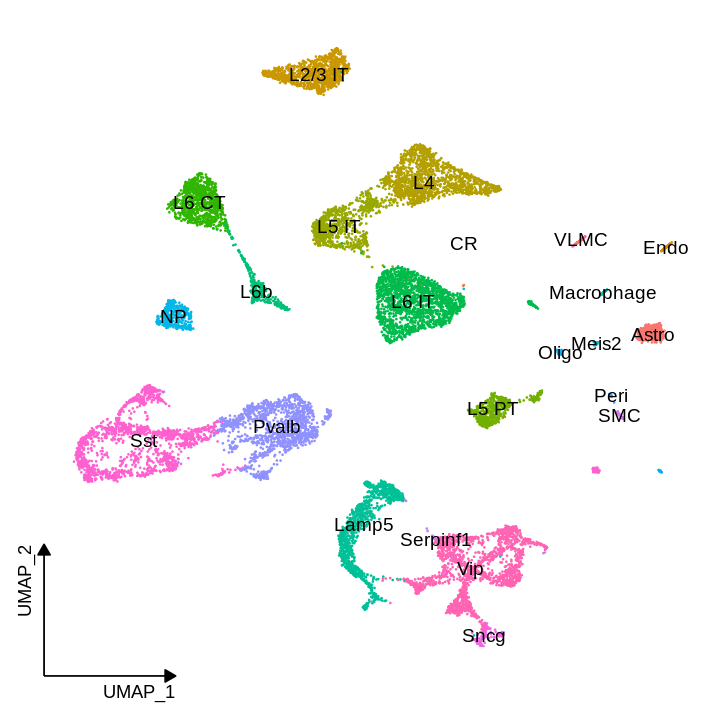

In [9]:
options(repr.plot.width = 6, repr.plot.height = 6)
DimPlot(sc.obj, label = TRUE) + theme_dr(xlength = 0.2, ylength = 0.2, arrow = grid::arrow(length = unit(0.1, "inches"), ends = 'last', type = "closed")) + theme(panel.grid = element_blank()) + NoLegend()
ggsave(file.path(out.figs.dir, 'UMAP.of.Mouse.brain.pdf'), width = 6, height = 6)

Centering and scaling data matrix



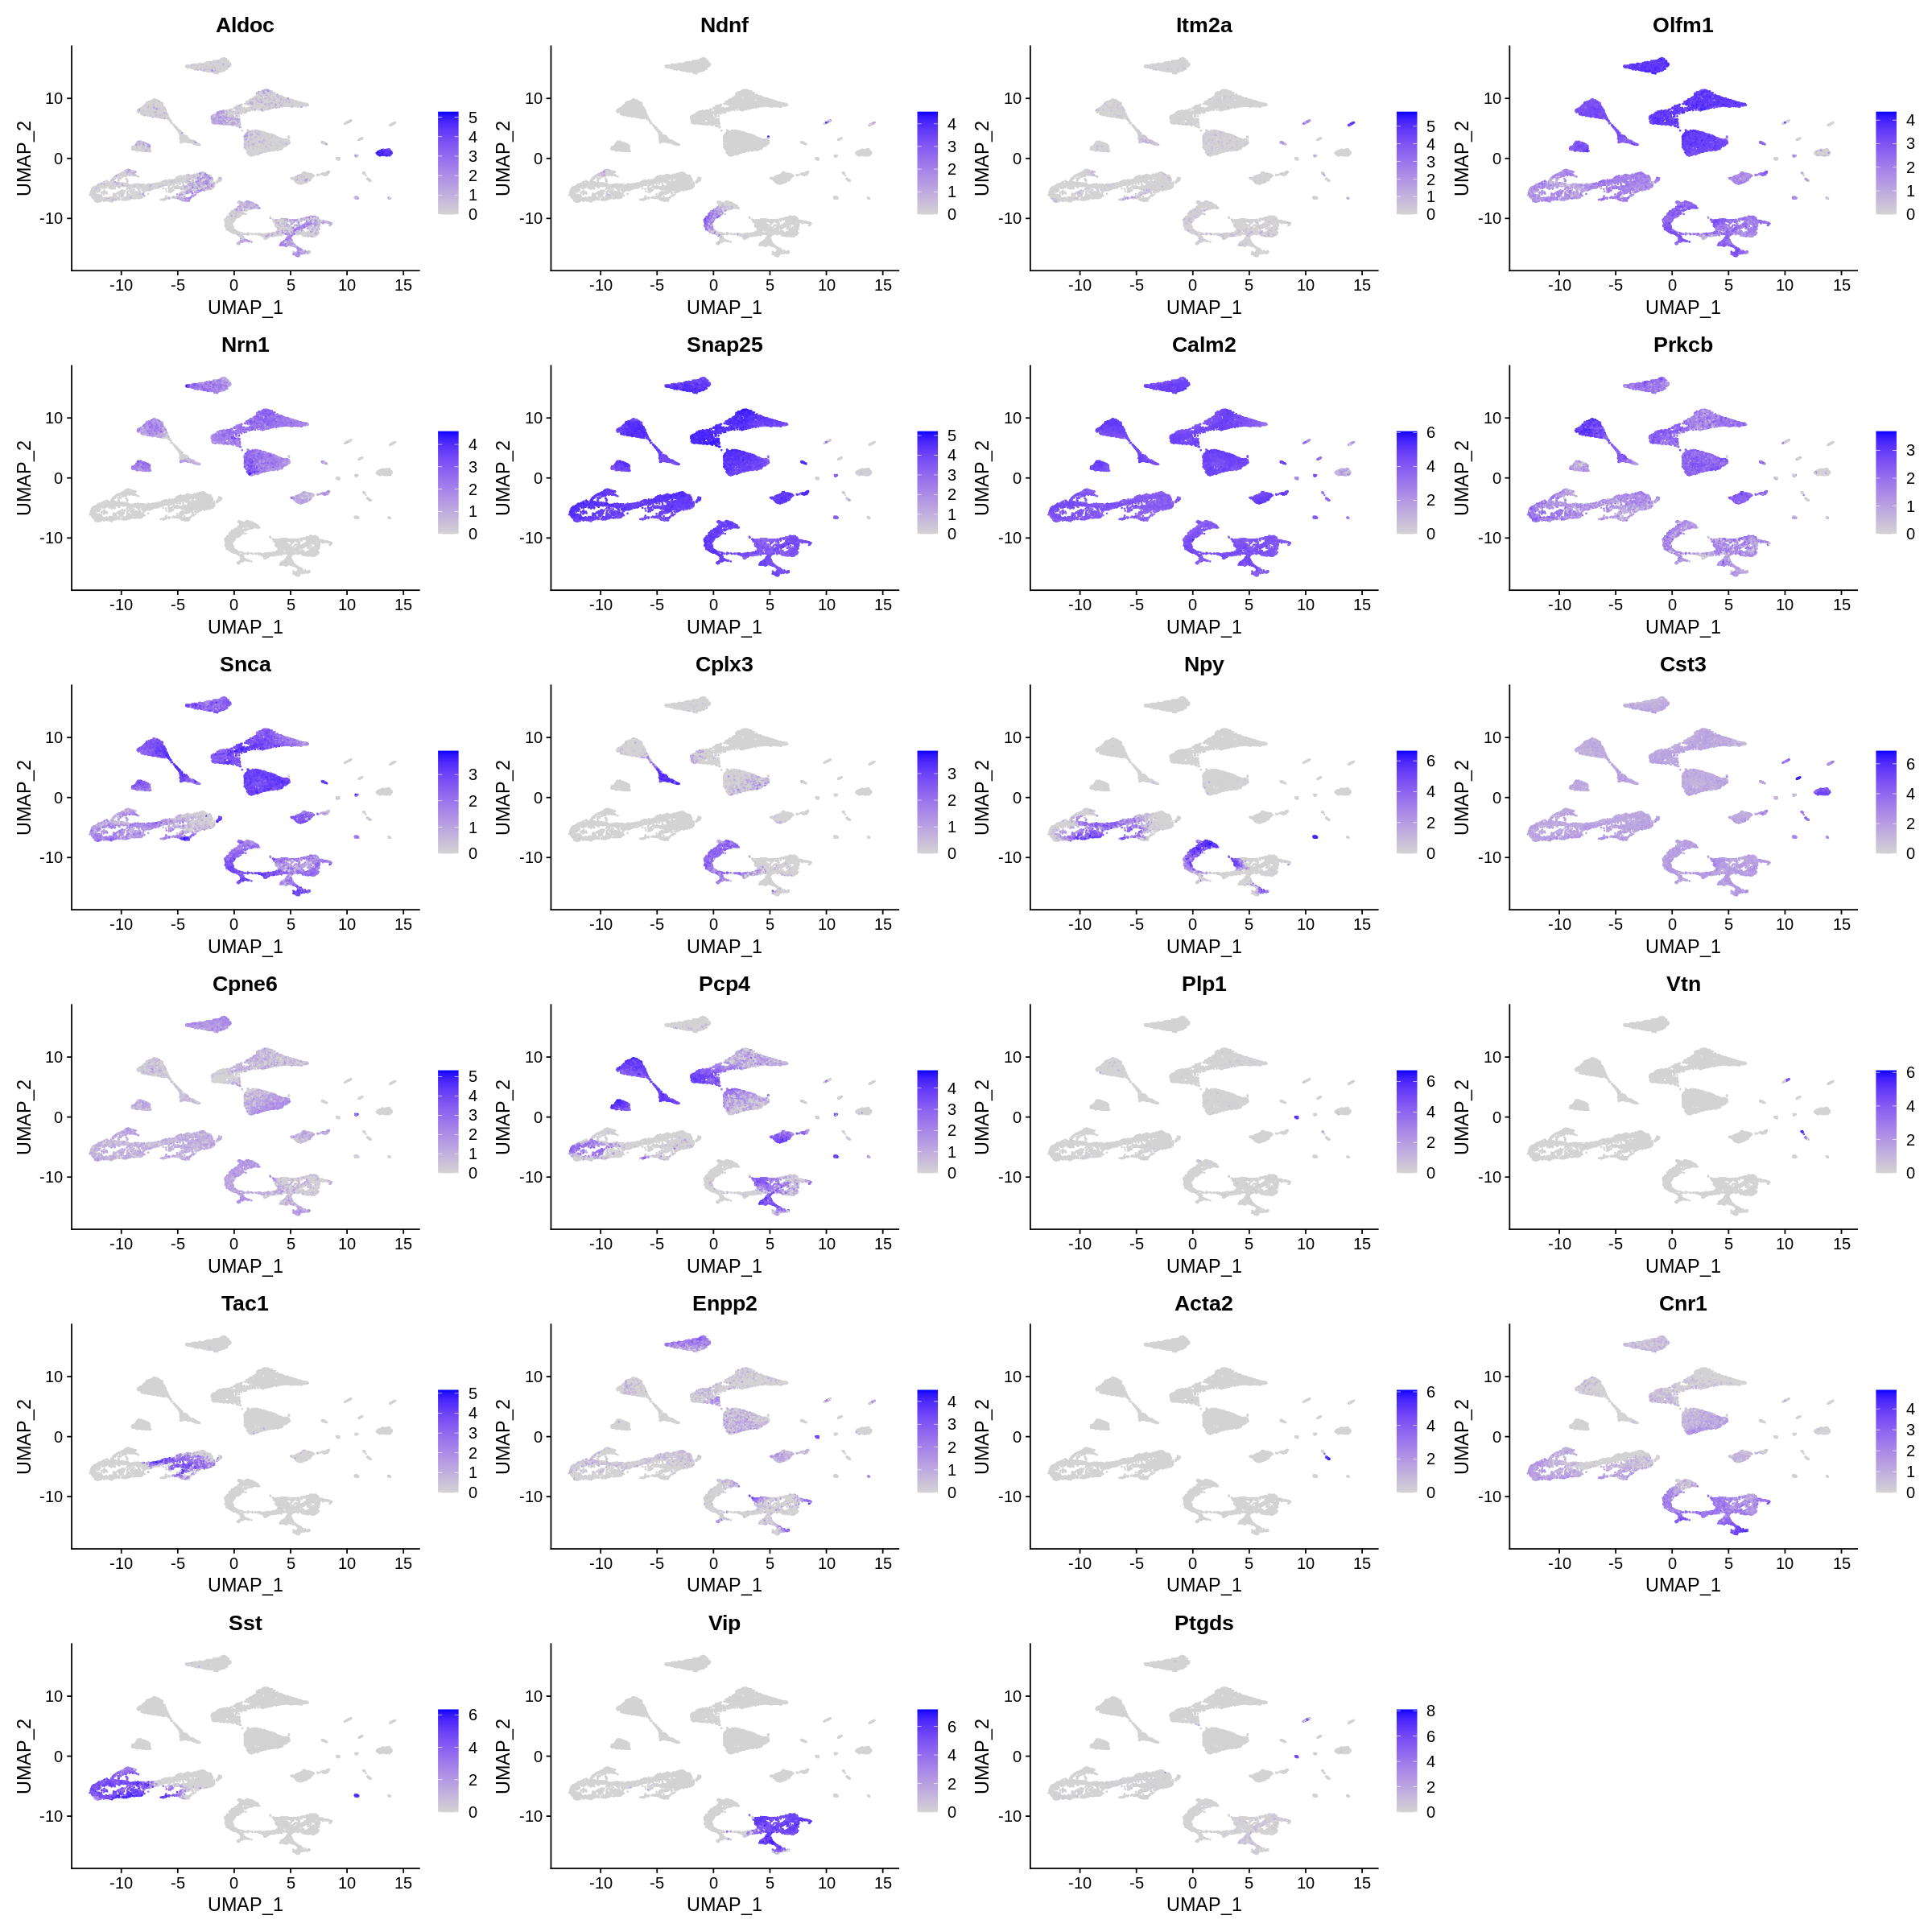

In [22]:
options(repr.plot.width = 20, repr.plot.height = 20)
FeaturePlot(sc.obj %>% NormalizeData %>% ScaleData, features = lapply(markers, function(xx) xx[1]) %>% unlist)
ggsave(file.path(out.figs.dir, 'candidate.markers.expr.UMAP.pdf'), width = 20, height = 20)

In [19]:
markers.sub <- lapply(markers, function(xx) xx[1 : 5])

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



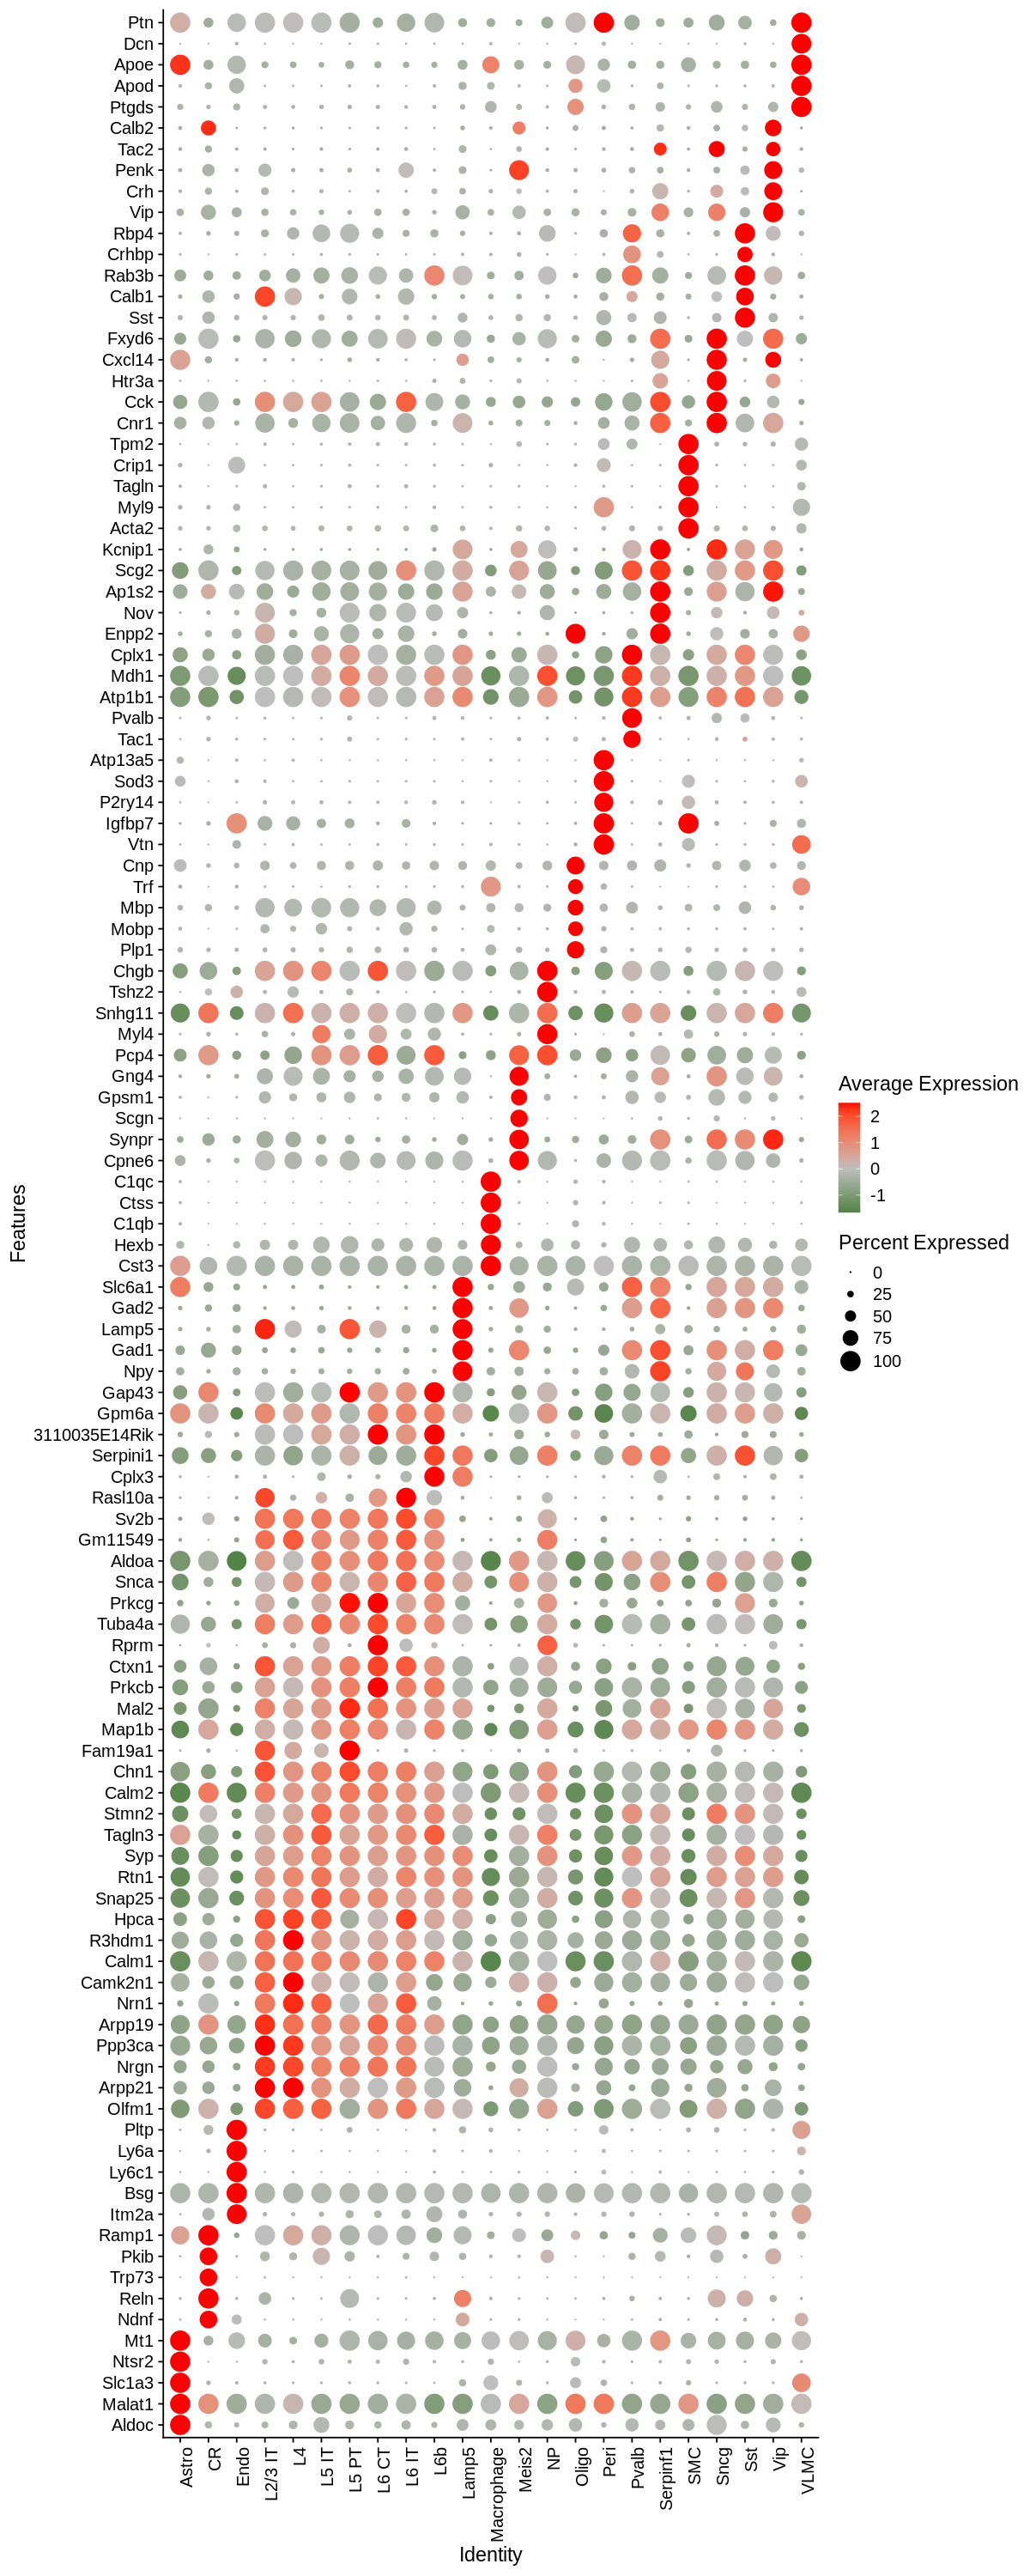

In [52]:
options(repr.plot.width = 10, repr.plot.height = 25)
gp <- DotPlot(sc.obj, features = unlist(markers.sub) %>% unique, assay = 'SCT') + coord_flip() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_colour_gradient2(low = "darkgreen", mid = "grey", high = "red")
gp
ggsave(file.path(out.figs.dir, 'markers.specific.dotplot.pdf'), width = 12, height = 25)
openxlsx::write.xlsx(gp$data, file = file.path(out.data.dir, 'markers.specific.dotplot.xlsx')) 

### Compare with Seurat method

In [ ]:
sc.markers <- sc.obj %>%
        PrepSCTFindMarkers(., verbose = verbose) %>%
        FindAllMarkers(., assay = "SCT", only.pos = TRUE, verbose = verbose) %>%
        .[!grepl("^MT-|^RP[L|S]", .$gene), ] %>%
        mutate(EScore = {
          .$avg_log2FC * .$pct.1
        }) %>%
        group_by(cluster) %>%
        top_n(wt = EScore, n = group.size) %>%
        {
          split(.$gene, .$cluster)
        } %>%
        .[lapply(., length) > 0]

In [23]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /public/home/glht02/software/anaconda3/envs/R4.0/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tidydr_0.0.4       ggpubr_0.4.0       stringr_1.4.0      reticulate_1.24   
[5] dplyr_1.0.8        ggplot2_3.3.5      SeuratObject_4.0.4 Seurat_4.1.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.15            colorspace_2.0-3      ggsignif_0.6.3       
  [4] deldir